In [68]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("delivery_time.csv")

In [10]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Basic EDA steps

In [4]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
data[data.duplicated()].shape

(0, 2)

<AxesSubplot:>

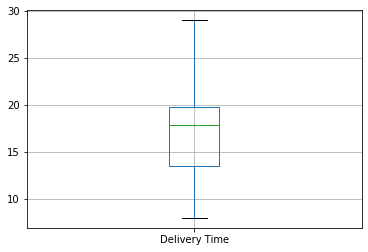

In [15]:
data.boxplot(column=['Delivery Time'])

<AxesSubplot:>

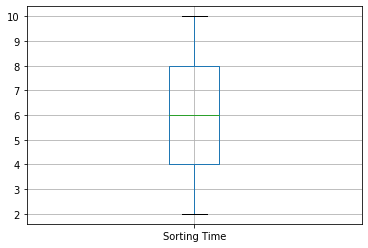

In [16]:
data.boxplot(column=['Sorting Time'])

<AxesSubplot:>

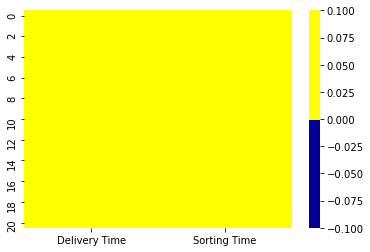

In [17]:
cols = data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing data. blue is non-missing data.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [25]:
data1 = data.rename({'Delivery Time': 'DeliveryT','Sorting Time': 'SortingT'}, axis=1)

In [26]:
data1.head()

,DeliveryT,SortingT
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Simple Linear Regression

In [27]:
data1.corr()

,DeliveryT,SortingT
DeliveryT,1.000000,0.825997
SortingT,0.825997,1.000000


C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryT', ylabel='Density'>

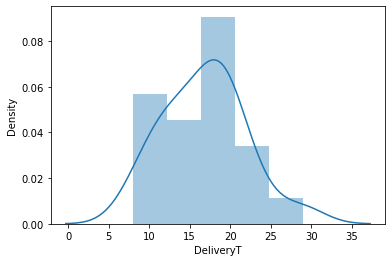

In [28]:
sns.distplot(data1['DeliveryT'])

C:\Users\kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingT', ylabel='Density'>

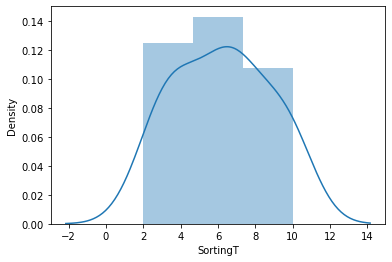

In [29]:
sns.distplot(data1['SortingT'])

In [50]:
model = smf.ols("DeliveryT~SortingT",data = data1).fit()

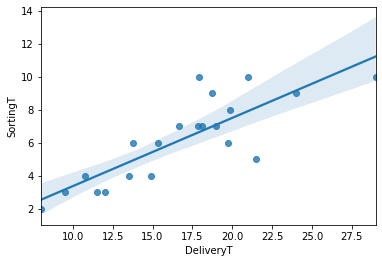

In [51]:
sns.regplot(x="DeliveryT", y="SortingT", data=data1);

In [52]:
#Coefficients
model.params

Intercept    6.582734
SortingT     1.649020
dtype: float64

In [53]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
SortingT     6.387447
dtype: float64 
 Intercept    0.001147
SortingT     0.000004
dtype: float64


In [54]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict For New Data

In [65]:
newdata=pd.Series([10,15,20,25])

In [66]:
data_predict=pd.DataFrame(newdata,columns=['SortingT'])

In [67]:
model.predict(data_predict)

0    23.072933
1    31.318032
2    39.563132
3    47.808231
dtype: float64